Programació per a la ciència de dades
============================

---

Unitat 5: Optimització de codi: programació concurrent i paral·lela
-----------------------------------------------------

---

### Instruccions d'ús

Aquest document és un *notebook* interactiu que intercala explicacions més aviat teòriques de conceptes de programació amb fragments de codi executables. Per aprofitar els avantatges que aporta aquest format, us recomanem que, en primer lloc, llegiu les explicacions i el codi que us proporcionem. D'aquesta manera, tindreu un primer contacte amb els conceptes que hi exposem. Ara bé, **la lectura és només el principi!** Una vegada hagueu llegit el contingut proporcionat, no oblideu executar el codi proporcionat i modificar-lo per crear-ne variants que us permetin comprovar que n'heu entès la funcionalitat i explorar-ne els detalls d'implementació. Finalment, us recomanem, també, consultar la documentació enllaçada per explorar amb més profunditat les funcionalitats dels mòduls presentats.



In [1]:
# %load_ext pycodestyle_magic

In [2]:
# %pycodestyle_on

### Introducció

En aquesta unitat veurem com podem optimitzar els programes en Python i programar-ne versions que aprofitin la concurrència dels processadors i/o el paral·lelisme que ofereixen les arquitectures actuals. Això ens permetrà dissenyar i implementar codi que aprofiti els recursos disponibles a la nostra màquina per fer la tasca per a la qual ha estat dissenyat.

En primer lloc, presentarem els conceptes bàsics de concurrència i paral·lelisme i farem una petita descripció dels *threads* i els processos.

Seguidament, explicarem com podem implementar codi *multithreaded* en Python i quan serà beneficiós fer-ho. Veurem, també, quins problemes es poden produir per l'execució amb múltiples fils i algunes de les eines que ens ofereix Python per evitar-los.

Després, ens centrarem en la creació de programes multiprocés. De nou, explicarem en quines situacions pot ser útil que un programa sigui multiprocés, veurem com implementar aquest tipus de programes des de Python i detallarem algunes alternatives per comunicar diferents processos.

A continuació, s'inclou la taula de continguts, que podeu fer servir per navegar pel document:

<ul style="list-style-type:none">
    <li><a href='#1.-Introducció'>1. Introducció</a></li>
    <li><a href="#2.-Ús-de-múltiples-threads-en-Python">2. Ús de múltiples <em>threads</em> en Python</a></li>
    <ul style="list-style-type:none">
        <li><a href='#2.1.-Introducció'> 2.1. Introducció</a></li>
        <li><a href="#2.2.-Optimització-de-codi-fent-servir-threads-en-Python">2.2. Optimització de codi fent servir <em>threads</em> en Python</a></li>
        <li><a href="#2.3.-Interferències-entre-threads">2.3. Interferències entre <em>threads</em></a></li>        
        <ul style="list-style-type:none">
            <li><a href='#2.3.1.-Deadlocks'>2.3.1. <em>Deadlocks</em></a></li>
        </ul>
    </ul>
    <li><a href="#3.-Ús-de-múltiples-processos-en-Python">3. Ús de múltiples processos en Python</a></li>
    <ul style="list-style-type:none">
        <li><a href="#3.1.-Introducció">3.1. Introducció</a></li>
        <li><a href="#3.2.-Optimització-de-codi-fent-servir-multiprocés-en-Python">3.2. Optimització de codi fent servir multiprocés en Python</a></li>
        <li><a href="#3.3.-Compartició-de-dades-i-coordinació-de-processos">3.3. Compartició de dades i coordinació de processos</a></li>
        <ul style="list-style-type:none">
            <li><a href='#3.3.1.-Variables-compartides'>3.3.1. Variables compartides</a></li>
            <li><a href='#3.3.2.-Comunicació-entre-processos'>3.3.2. Comunicació entre processos</a></li>
        </ul>
    </ul>
    <li><a href='#4.-Exercicis-per-practicar'>4. Exercicis per practicar</a></li>
    <ul style="list-style-type:none">
        <li><a href='#4.1.-Solucions-dels-exercicis-per-practicar'>4.1. Solucions dels exercicis per practicar</a></li>
    </ul>
    <li><a href='#5.-Bibliografia'>5. Bibliografia</a></li>
    <ul style="list-style-type:none">
        <li><a href='#5.1.-Bibliografia-bàsica'>5.1. Bibliografia bàsica</a></li>
        <li><a href='#5.2.-Bibliografia-addicional-(ampliació-de-coneixements)'>5.2. Bibliografia addicional</a></li>
    </ul>
</ul>

# 1. Introducció

Fins ara hem creat programes que s'executen **seqüencialment**: seguint el flux d'execució definit pel codi, les instruccions s'executaven sempre una darrere l'altra esperant que finalitzés cada instrucció per començar a executar la següent. Ara bé, d'una banda, la majoria d'ordinadors moderns disposen de diverses CPU, que permeten executar diversos fluxos d'execució alhora; d'altra banda, tot i disposar d'una única CPU, a vegades serà més eficient anar intercalant l'execució de diversos fils en comptes d'anar esperant que finalitzi cada un per executar el següent. És el cas, per exemple, de fils d'execució que esperen esdeveniments externs: mentre un dels fils espera l'esdeveniment extern, un altre fil pot aprofitar la CPU per fer càlculs.

Així, en aquest *notebook* descriurem com podem fer programació **concurrent** (en la qual diverses tasques poden avançar simultàniament sense necessitat d'esperar que en finalitzi una per iniciar la següent) i programació **paral·lela** (en la qual diverses tasques s'executen alhora) en Python. La imatge següent mostra el concepte clau que distingeix la programació seqüencial, la concurrent i la paral·lela:

![Concurrència](img/concurrencia_cat.png)


A continuació, descriurem com es pot implementar la concurrència i el paral·lelisme en Python fent servir *threads* i processos.

Un **procés** és un programa que s'ha carregat en memòria per executar-lo, juntament amb els recursos que necessita per executar-se. Aquests recursos contenen els registres (que poden contenir una instrucció, una adreça, una dada, etc.), el comptador de programa (un registre especial que emmagatzema un punter en la instrucció que s'executa) i la pila i el *heap* (amb el fil de crides que han anat succeint i les variables que s'han anat creant).

Un **fil d'execució** o _**thread**_ és una unitat d'execució dins d'un procés. Un procés sempre té com a mínim un *thread* i en pot tenir diversos.

Quan un procés es crea, se li assignen els recursos necessaris per executar-se (entre els quals hi ha la memòria on s'emmagatzemen les variables). Així, doncs, cada nou procés disposarà del seu espai de memòria (que s'assigna en el moment de la creació).

En canvi, la creació d'un nou *thread* en un procés no requereix l'assignació de nous recursos: cada *thread* d'execució d'un procés compartirà la memòria ja assignada al procés en què s'ha creat. Els *threads* sí que tindran algun recurs propi, però serà mínim i es limitarà a les dades bàsiques que permetin mantenir l'execució (per exemple, tindran el seu propi comptador de programa que indiqui quina instrucció executen).

Això té dues implicacions clares. D'una banda, tant la creació de nous processos com els canvis de context entre processos són més costosos que entre *threads* (per l'*overhead* que es produeix en haver de gestionar la memòria). D'altra banda, els *threads* podran tenir problemes d'interferència en compartir espais de memòria, però serà fàcil passar dades d'un *thread* a un altre justament per aquesta compartició; en canvi, serà més costós comunicar processos entre ells, ja que diferents processos tindran espais de memòria diferents.

En aquesta introducció s'ha detallat de manera simplificada com funciona la gestió de memòria en l'execució de programes, ja que no és l'objectiu principal d'aquest mòdul. Si esteu interessats a explorar en més detall què diferencia, quant al sistema operatiu, els *threads* dels processos, us recomanem que visiteu els enllaços següents ([1](https://www.youtube.com/watch?v=TRH2HupGkgI), [2](https://www.youtube.com/watch?v=PBb0NRvo96s), [3](https://www.youtube.com/watch?v=Dhf-DYO1K78), [4](https://www.youtube.com/watch?v=3WmNGc9qP0g), [5](https://www.youtube.com/watch?v=X668LfXObaM)).

# 2. Ús de múltiples *threads* en Python

## 2.1. Introducció

En aquesta secció veurem com podem implementar *threads* en Python fent servir el mòdul [`threading`](https://docs.python.org/3.8/library/threading.html).

El mòdul [`threading`](https://docs.python.org/3.8/library/threading.html) implementa la classe [`Thread`](https://docs.python.org/3.8/library/threading.html#threading.Thread), que representa un flux d'execució que corre en un *thread* individual. Per tal de crear diversos fils d'execució dins del nostre programa, crearem, doncs, diferents instàncies de la classe [`Thread`](https://docs.python.org/3.8/library/threading.html#threading.Thread) especificant quina funció han d'executar i amb quins paràmetres.

Una vegada creada la instància de [`Thread`](https://docs.python.org/3.8/library/threading.html#threading.Thread), podem iniciar-ne l'execució cridant el mètode [`start`](https://docs.python.org/3.8/library/threading.html#threading.Thread.start). Per tal de controlar la finalització dels diferents fils d'execució des del fil principal, farem servir el mètode [`join`](https://docs.python.org/3.8/library/threading.html#threading.Thread.join) de cada *thread*: aquest mètode bloqueja l'execució del fil en què s'executa fins que finalitza el *thread* sobre el qual s'ha cridat.

A continuació s'implementa un exemple senzill d'execució *multithreaded* amb el mòdul [`threading`](https://docs.python.org/3.8/library/threading.html). Definim una funció `random_wait` que espera un temps aleatori entre un i quatre segons i que serà la funció que executaran els diferents fils. El codi principal crea tres instàncies de la classe [`Thread`](https://docs.python.org/3.8/library/threading.html#threading.Thread), que executen la funció `random_wait`, i les inicia (amb `thread.start()`). Després, el fil principal espera que finalitzin cadascun dels tres *threads*, cridant el mètode [`join`](https://docs.python.org/3.8/library/threading.html#threading.Thread.join) de cadascun.


In [8]:
from threading import Thread
from random import randint
from time import sleep
import logging
import sys


def random_wait(t_index):
    """
    Espera un temps aleatori entre un i quatre segons.
    """
    logging.info("[T{}]\tStarted".format(t_index))
    t = randint(1, 4)
    logging.info("[T{}]\tSleeping {} seconds...".format(t_index, t))
    sleep(t)
    logging.info("[T{}]\tEnd".format(t_index))


# Configura el *logging*
log_format = '[%(process)d]\t%(asctime)s %(levelname)s: %(message)s'
logging.basicConfig(format=log_format, level=logging.INFO, datefmt="%H:%M:%S",
                    handlers=[logging.StreamHandler(sys.stdout)],force=True)

# Crea tres *threads* que executen la funció random_wait i
# els inicia
threads = []
num_threads = 3
for i in range(num_threads):
    logging.info("[M]\tCreating thread {}".format(i))
    # Creem el thread
    thread = Thread(target=random_wait, args=(i,))
    threads.append(thread)
    # Executem el thread
    thread.start()

# Espera que els tres *threads* finalitzin
for i, thread in enumerate(threads):
    logging.info("[M]\tWaiting to join thread {}".format(i))
    thread.join()
    logging.info("[M]\tThread {} joined!".format(i))

logging.info("[M]\tDONE!")

[197]	14:56:16 INFO: [M]	Creating thread 0
[197]	14:56:16 INFO: [T0]	Started
[197]	14:56:16 INFO: [M]	Creating thread 1
[197]	14:56:16 INFO: [T0]	Sleeping 2 seconds...
[197]	14:56:16 INFO: [T1]	Started
[197]	14:56:16 INFO: [M]	Creating thread 2
[197]	14:56:16 INFO: [T1]	Sleeping 3 seconds...
[197]	14:56:16 INFO: [T2]	Started
[197]	14:56:16 INFO: [T2]	Sleeping 2 seconds...
[197]	14:56:16 INFO: [M]	Waiting to join thread 0
[197]	14:56:18 INFO: [T0]	End
[197]	14:56:18 INFO: [M]	Thread 0 joined!
[197]	14:56:18 INFO: [M]	Waiting to join thread 1
[197]	14:56:18 INFO: [T2]	End
[197]	14:56:19 INFO: [T1]	End
[197]	14:56:19 INFO: [M]	Thread 1 joined!
[197]	14:56:19 INFO: [M]	Waiting to join thread 2
[197]	14:56:19 INFO: [M]	Thread 2 joined!
[197]	14:56:19 INFO: [M]	DONE!


En primer lloc, fixeu-vos que la funció `random_wait` rep un paràmetre que fem servir per identificar cadascun dels *threads*. Per facilitar el seguiment de l'execució, mostrem aquest identificador entre claudàtors cada vegada que mostrem un missatge de diari.

En segon lloc, cal tenir en compte que els diferents fils s'executen concurrentment: mentre el fil principal crea el segon i tercer fils, el primer fil creat ja s'executa. Vegeu, també, que el primer fil a iniciar-se (`T0`) no és necessàriament el primer a finalitzar, ja que això dependrà de les esperes aleatòries que es produeixen en cada fil.

En tercer lloc, és interessant tenir en compte que no hem fet servir la instrucció `print` per mostrar els missatges que informen de quina part del codi s'executa, sinó que hem utilitzat el mòdul [`logging`](https://docs.python.org/3.8/library/logging.html). El principal motiu per fer-ho és el d'assegurar que els diferents missatges es mostren sense interrupcions i amb el format desitjat, tot i que els escriguin diferents fils d'execució. Addicionalment, fer servir [`logging`](https://docs.python.org/3.8/library/logging.html) ens ofereix altres funcionalitats, com ara el fet de mostrar informació addicional abans de cada missatge. En el cas del fragment de codi executat en la cel·la anterior hem aprofitat per mostrar l'identificador del procés, l'hora i el nivell del missatge.

El mòdul [`logging`](https://docs.python.org/3.8/library/logging.html) té com a objectiu facilitar la creació de registres o *logs* en Python i ajudar, així, en el seguiment del flux d'execució dels programes. Els *logs* contenen normalment un registre dels esdeveniments que han succeït i permeten seguir el comportament d'un programa amb diverses finalitats. Així, per exemple, els *logs* poden servir per ajudar a detectar i depurar errors, per avaluar el rendiment d'un programa, per mostrar informació addicional sobre com o qui l'utilitza, etc. Aquest mòdul és, per tant, molt útil alhora de fer el seguiment de l'execució de codi concurrent. Si voleu explorar l'ús d'aquesta llibreria, us recomanem llegir els tutorials oficials (tant el [bàsic](https://docs.python.org/3/howto/logging.html#logging-basic-tutorial) com el més [avançat](https://docs.python.org/3/howto/logging.html#logging-advanced-tutorial)).

## 2.2. Optimització de codi fent servir *threads* en Python

No tots els programes poden beneficiar-se de l'execució en múltiples *threads*. D'una banda, els programes que requereixen conèixer uns resultats anteriors per calcular-ne els següents difícilment s'executaran més ràpid en un entorn *multithreaded*, ja que els diferents fils no podran executar-se concurrentment. D'altra banda, en la seva versió més estesa, Python executa els diferents *threads* en un mateix processador, de manera que l'execució d'aquests és concurrent (però no paral·lela). Vegem-ho amb un parell d'exemples.

En la cel·la següent es defineix la funció `get_factors`, que, donat un enter, en calcula la descomposició en factors primers i la retorna:

In [9]:
from sympy import primefactors


def get_factors(t_index, value):
    """
    Retorna la factorització de `value` en factors primers.
    """
    logging.info("[T{}]\tStarted with input {}".format(t_index, value))
    r = primefactors(value)
    logging.info("[T{}]\tEnded with output {}".format(t_index, r))

In [10]:
# Factoritzem el valor 15
get_factors(1, 15)

[197]	14:58:32 INFO: [T1]	Started with input 15
[197]	14:58:32 INFO: [T1]	Ended with output [3, 5]


Ara calcularem la factorització de tres enters fent servir la funció `get_factors` de manera seqüencial:

In [12]:
nums_to_factor = [5215785878052641903952977068511001599,
                  748283119772062608265951220534384001023,
                  949273031776466197045163567568010291199]

In [17]:
%%time

for _, num in enumerate(nums_to_factor):
    get_factors(1, num)

[197]	15:01:56 INFO: [T1]	Started with input 5215785878052641903952977068511001599
[197]	15:01:56 INFO: [T1]	Ended with output [479001599, 10888869450418352160768000001]
[197]	15:01:56 INFO: [T1]	Started with input 748283119772062608265951220534384001023
[197]	15:01:56 INFO: [T1]	Ended with output [68720001023, 10888869450418352160768000001]
[197]	15:01:56 INFO: [T1]	Started with input 949273031776466197045163567568010291199
[197]	15:01:56 INFO: [T1]	Ended with output [87178291199, 10888869450418352160768000001]
CPU times: user 5.83 ms, sys: 0 ns, total: 5.83 ms
Wall time: 5.91 ms


A continuació, tornarem a repetir el càlcul de la factorització dels mateixos tres enters executant-los com a *threads* independents:

In [18]:
%%time
threads = []

# Crea tres *threads* que executen la funció get_factors i
# els inicia
for i, num in enumerate(nums_to_factor):
    thread = Thread(target=get_factors, args=(i, num))
    threads.append(thread)
    thread.start()

# Espera que els tres *threads* finalitzin
for i, thread in enumerate(threads):
    logging.info("[M]\tWaiting to join thread {}".format(i))
    thread.join()
    logging.info("[M]\tThread {} joined!".format(i))

logging.info("[M]\tDONE!")

[197]	15:01:58 INFO: [T0]	Started with input 5215785878052641903952977068511001599
[197]	15:01:58 INFO: [T0]	Ended with output [479001599, 10888869450418352160768000001]
[197]	15:01:58 INFO: [T2]	Started with input 949273031776466197045163567568010291199
[197]	15:01:58 INFO: [M]	Waiting to join thread 0
[197]	15:01:58 INFO: [T1]	Started with input 748283119772062608265951220534384001023
[197]	15:01:58 INFO: [T2]	Ended with output [87178291199, 10888869450418352160768000001]
[197]	15:01:58 INFO: [M]	Thread 0 joined!
[197]	15:01:58 INFO: [M]	Waiting to join thread 1
[197]	15:01:58 INFO: [T1]	Ended with output [68720001023, 10888869450418352160768000001]
[197]	15:01:58 INFO: [M]	Thread 1 joined!
[197]	15:01:58 INFO: [M]	Waiting to join thread 2
[197]	15:01:58 INFO: [M]	Thread 2 joined!
[197]	15:01:58 INFO: [M]	DONE!
CPU times: user 10.3 ms, sys: 3.96 ms, total: 14.3 ms
Wall time: 17.2 ms


Els temps d'execució de les dues versions del codi (la primera, seqüencial, i la segona, amb múltiples *threads*) són molt similars (i, sovint, la versió seqüencial resulta més ràpida). Això és així perquè els diferents *threads* s'executen en un mateix processador i tots executen codi que requereix temps de còmput de CPU. Per tant, la possible concurrència en l'execució no s'aprofita i l'*overhead* que produeix la gestió dels *threads* impacta negativament en el rendiment del codi. Així, doncs, aquest és un exemple clar d'un fragment de codi que **no** es beneficiarà d'una implementació amb múltiples fils d'execució en Python.

Vegem ara un segon exemple, en el qual crearem també tres *threads*: dos descarregaran uns conjunts de dades d'internet i el tercer tornarà a factoritzar un dels números de l'exemple anterior.

En primer lloc, definim la funció `get_url_and_write_to_disk`, que descarrega el contingut d'un URL i el desa al disc:

In [19]:
import requests

def get_url_and_write_to_disk(t_index, url):
    """
    Descarrega el contingut de l'URL i el desa a la carpeta `data`.
    """
    logging.info("[T{}]\tStarted with url {}".format(t_index, url))
    r = requests.get(url, allow_redirects=True)
    open('data/'+str(t_index), 'wb').write(r.content)
    logging.info("[T{}]\tEnd".format(t_index))

In [20]:
urls = ["https://snap.stanford.edu/data/twitter.tar.gz",
        "https://snap.stanford.edu/data/twitter_combined.txt.gz"]

Ara, com en l'exemple anterior, executarem les tres tasques de manera seqüencial: primer factoritzarem l'enter i després descarregarem els dos fitxers apuntats pels URL de la llista de la cel·la anterior:

In [21]:
%%time

get_factors(1, nums_to_factor[-1])

[197]	15:08:31 INFO: [T1]	Started with input 949273031776466197045163567568010291199
[197]	15:08:31 INFO: [T1]	Ended with output [87178291199, 10888869450418352160768000001]
CPU times: user 2.75 ms, sys: 43 µs, total: 2.79 ms
Wall time: 2.66 ms


In [25]:
%%time

for url in urls:
    get_url_and_write_to_disk(1, url)

[197]	15:10:00 INFO: [T1]	Started with url https://snap.stanford.edu/data/twitter.tar.gz
[197]	15:10:03 INFO: [T1]	End
[197]	15:10:03 INFO: [T1]	Started with url https://snap.stanford.edu/data/twitter_combined.txt.gz
[197]	15:10:05 INFO: [T1]	End
CPU times: user 160 ms, sys: 133 ms, total: 292 ms
Wall time: 4.69 s


A continuació, implementem la versió *multithreaded* del codi anterior tot creant tres *threads* (dos que descarregaran fitxers i un que farà el càlcul de la factorització).

In [29]:
%%time

# Creem els tres *threads* que executen get_factors o get_url_and_write_to_disk
# i els iniciem
threads = []
for i in range(3):
    if i == 2:
        thread = Thread(target=get_factors, args=(i, nums_to_factor[-1]))
    else:
        thread = Thread(target=get_url_and_write_to_disk, args=(i, urls[i]))

    threads.append(thread)
    thread.start()

# Esperem que els tres *threads* finalitzin
for i, thread in enumerate(threads):
    logging.info("[M]\tWaiting to join thread {}".format(i))
    thread.join()
    logging.info("[M]\tThread {} joined!".format(i))

logging.info("[M]\tDONE!")

[197]	15:13:36 INFO: [T0]	Started with url https://snap.stanford.edu/data/twitter.tar.gz
[197]	15:13:36 INFO: [T1]	Started with url https://snap.stanford.edu/data/twitter_combined.txt.gz
[197]	15:13:36 INFO: [T2]	Started with input 949273031776466197045163567568010291199
[197]	15:13:36 INFO: [M]	Waiting to join thread 0
[197]	15:13:36 INFO: [T2]	Ended with output [87178291199, 10888869450418352160768000001]
[197]	15:13:38 INFO: [T1]	End
[197]	15:13:38 INFO: [T0]	End
[197]	15:13:38 INFO: [M]	Thread 0 joined!
[197]	15:13:38 INFO: [M]	Waiting to join thread 1
[197]	15:13:38 INFO: [M]	Thread 1 joined!
[197]	15:13:38 INFO: [M]	Waiting to join thread 2
[197]	15:13:38 INFO: [M]	Thread 2 joined!
[197]	15:13:38 INFO: [M]	DONE!
CPU times: user 188 ms, sys: 145 ms, total: 333 ms
Wall time: 2.36 s


A diferència del primer exemple, ara sí que veiem una millora clara en el temps d'execució de la versió concurrent en relació amb la versió seqüencial del nostre codi. En aquest cas, el fet que els tres *threads* no executin una tasca centrada en la CPU, sinó que dos descarreguin dades i les desin en disc i el tercer sí que faci servir la CPU, fa que el temps d'execució global millori amb l'execució concurrent: tot el codi s'ha executat en una única CPU, però els temps d'espera produïts per les limitacions de la xarxa i l'escriptura en disc són aprofitats per fer càlculs.

## 2.3. Interferències entre *threads*

En crear instàncies de la classe [`Thread`](https://docs.python.org/3.8/library/threading.html#threading.Thread) que executen una funció (que es passa com a `target` al constructor de la classe), els diferents *threads* que s'executen concurrentment disposen d'una còpia pròpia de totes les variables locals de la funció que executen (per exemple, de la variable `r` de la funció `get_url_and_write_to_disk` o de la variable `t` de la funció `random_wait`), però comparteixen les mateixes variables globals.

El fet que diversos fils d'execució comparteixin les mateixes variables pot provocar interferències entre els diversos fils a l'hora de fer servir aquestes variables, interferències que poden causar comportaments indesitjats en els programes *multithreaded*.

Per veure un exemple dels problemes que es poden produir, recuperem el codi de la factorització concurrent d'una llista d'enters i hi afegim una variable global `factor_ctr`, que comptarà quants números s'han factoritzat. La funció `get_factors` llegirà el valor de la variable i la incrementarà quan hagi finalitzat cada factorització:

In [37]:
def get_factors(t_index, value):
    global factor_ctr
    logging.info("[T{}]\tStarted with input {}".format(t_index, value))
    c = factor_ctr
    r = primefactors(value)
    factor_ctr = c + 1
    logging.info("[T{}]\tEnded with output {}".format(t_index, r))


factor_ctr = 0
threads = []
for i, num in enumerate(nums_to_factor):
    thread = Thread(target=get_factors, args=(i, num))
    threads.append(thread)
    thread.start()

for i, thread in enumerate(threads):
    logging.info("[M]\tWaiting to join thread {}".format(i))
    thread.join()
    logging.info("[M]\tThread {} joined!".format(i))

logging.info("[M]\tDONE!")
logging.info("[M]\tFactor counter is: {}".format(factor_ctr))

[197]	15:28:52 INFO: [T0]	Started with input 5215785878052641903952977068511001599
[197]	15:28:52 INFO: [T1]	Started with input 748283119772062608265951220534384001023
[197]	15:28:52 INFO: [T0]	Ended with output [479001599, 10888869450418352160768000001]
[197]	15:28:52 INFO: [T2]	Started with input 949273031776466197045163567568010291199
[197]	15:28:52 INFO: [T2]	Ended with output [87178291199, 10888869450418352160768000001]
[197]	15:28:52 INFO: [T1]	Ended with output [68720001023, 10888869450418352160768000001]
[197]	15:28:52 INFO: [M]	Waiting to join thread 0
[197]	15:28:52 INFO: [M]	Thread 0 joined!
[197]	15:28:52 INFO: [M]	Waiting to join thread 1
[197]	15:28:52 INFO: [M]	Thread 1 joined!
[197]	15:28:52 INFO: [M]	Waiting to join thread 2
[197]	15:28:52 INFO: [M]	Thread 2 joined!
[197]	15:28:52 INFO: [M]	DONE!
[197]	15:28:52 INFO: [M]	Factor counter is: 3


Fixeu-vos que, tot i haver executat tres vegades la funció `get_factors`, el valor final de la variable `factor_ctr` és 1 en comptes de 3. Si ens fixem en l'ordre amb què s'han executat les instruccions podrem deduir què ha passat: els tres *threads* han començat a executar-se i han copiat el valor inicial de la variable global `factor_ctr` en les seves respectives variables locals `c`. Els tres *threads* han executat aquesta assignació **abans** que cap d'ells actualitzés el valor de la variable, de manera que les tres variables locals `c` contenen inicialment el valor 0. Després de factoritzar l'enter, els tres *threads* han procedit a actualitzar la variable global `factor_ctr` assignant-li el valor 1 (`c + 1`). Cada *thread* ha actualitzat, doncs, el valor de global `factor_ctr`, però sobreescrivint-la sempre amb el valor 1.

El problema del codi anterior és, d'una banda, que l'actualització de la variable es fa en dos passos (lectura del valor original i escriptura del nou valor) i, d'altra banda, que tots tres *threads* accedeixen a la variable global sense cap mena de control sobre qui la fa servir en cada moment. Això fa que lectures i escriptures dels diversos fils s'intercalin i produeixin un resultat incorrecte per al nostre objectiu. Per obtenir el resultat correcte hauríem d'assegurar que cada *thread* llegeix el valor actual de la variable `factor_ctr` i escriu el valor actualitzat (resultat d'incrementar-la en una unitat) de manera **atòmica**.

Una alternativa per assegurar l'atomicitat de l'operació d'actualització de la variable és bloquejar-ne l'ús (en anglès, parlarem d'obtenir un *lock* o bloqueig sobre la variable) abans de fer-la servir, assegurant que cap altra *thread* pot treballar-hi mentre duri el bloqueig. Així, el fil que obté el bloqueig podrà llegir i escriure la variable (en definitiva, actualitzar-la), sense que hi hagi interferències per part dels altres fils d'execució.

El mòdul [`threading`](https://docs.python.org/3.8/library/threading.html) permet implementar bloquejos fent servir la classe [`Lock`](https://docs.python.org/3.8/library/threading.html#threading.Lock), que disposa dels mètodes [`acquire`](https://docs.python.org/3.8/library/threading.html#threading.Lock.acquire) i [`release`](https://docs.python.org/3.8/library/threading.html#threading.Lock.release), que bloquegen i desbloquegen l'accés a fragments de codi. El primer fil que executa un [`acquire`](https://docs.python.org/3.8/library/threading.html#threading.Lock.acquire) sobre un [`lock`](https://docs.python.org/3.8/library/threading.html#threading.Lock), n'obtindrà el dret d'execució i la resta de fils que executin l'[`acquire`](https://docs.python.org/3.8/library/threading.html#threading.Lock.acquire) hauran d'esperar que aquest quedi alliberat amb l'execució del mètode [`release`](https://docs.python.org/3.8/library/threading.html#threading.Lock.release). A continuació, s'implementa l'exemple anterior fent servir *locks* per controlar l'actualització de la variable `factor_ctr`:

In [38]:
from threading import Lock


def get_factors(t_index, value, lock):
    global factor_ctr
    logging.info("[T{}]\tStarted with input {}".format(t_index, value))
    # Es bloqueja l'accés a aquesta part del codi: només un *thread*
    # podrà accedir-hi fins que no s'alliberi
    lock.acquire()
    c = factor_ctr + 1
    r = primefactors(value)
    factor_ctr = c
    # S'allibera l'accés i es permet així que un altre *thread* accedeixi
    # a aquest fragment de codi
    lock.release()
    logging.info("[T{}]\tEnded with output {}".format(t_index, r))


factor_ctr = 0
# Es crea un *lock*, que servirà per controlar l'accés al fragment de codi
# que actualitza la variable global
lock = Lock()
threads = []
for i, num in enumerate(nums_to_factor):
    thread = Thread(target=get_factors, args=(i, num, lock))
    threads.append(thread)
    thread.start()

for i, thread in enumerate(threads):
    logging.info("[M]\tWaiting to join thread {}".format(i))
    thread.join()
    logging.info("[M]\tThread {} joined!".format(i))

logging.info("[M]\tDONE!")
logging.info("[M]\tFactor counter is: {}".format(factor_ctr))


[197]	15:32:12 INFO: [T0]	Started with input 5215785878052641903952977068511001599
[197]	15:32:12 INFO: [T1]	Started with input 748283119772062608265951220534384001023
[197]	15:32:12 INFO: [T1]	Ended with output [68720001023, 10888869450418352160768000001]
[197]	15:32:12 INFO: [M]	Waiting to join thread 0
[197]	15:32:12 INFO: [T0]	Ended with output [479001599, 10888869450418352160768000001]
[197]	15:32:12 INFO: [T2]	Started with input 949273031776466197045163567568010291199
[197]	15:32:12 INFO: [T2]	Ended with output [87178291199, 10888869450418352160768000001]
[197]	15:32:12 INFO: [M]	Thread 0 joined!
[197]	15:32:12 INFO: [M]	Waiting to join thread 1
[197]	15:32:12 INFO: [M]	Thread 1 joined!
[197]	15:32:12 INFO: [M]	Waiting to join thread 2
[197]	15:32:12 INFO: [M]	Thread 2 joined!
[197]	15:32:12 INFO: [M]	DONE!
[197]	15:32:12 INFO: [M]	Factor counter is: 3


En el codi de la cel·la anterior es crea un objecte [`Lock`](https://docs.python.org/3.8/library/threading.html#lock-objects) global, que es fa servir per controlar l'accés a les tres línies de codi següents:
```
    c = factor_ctr + 1
    r = primefactors(value)
    factor_ctr = c
```
que implementen l'actualització de la variable global `factor_ctr`. D'aquesta manera, s'aconsegueix que no hi hagi interferències entre els tres *threads* i que la variable comptabilitzi correctament el nombre de factoritzacions.

Hi ha un detall a comentar en relació amb l'exemple que hem fet servir per motivar l'ús de *locks*: el codi d'actualització de la variable `factor_ctr` està programat explícitament perquè passi molt temps entre la lectura de la variable i l'escriptura del valor actualitzat, ja que entremig s'hi executa la factorització (que és una operació lenta). Això assegura que es produeixen efectivament interferències en l'execució dels diferents fils i permet visualitzar un dels problemes que comporta la compartició de variables entre fils d'execució. Ara bé, si haguéssim fet l'actualització de manera més compacta, *probablement* no hauríem pogut observar les interferències produïdes entre els *threads*, ja que el codi hauria donat el resultat esperat tot i no implementar cap mena de control sobre l'accés a la variable. Tot i així, sempre és aconsellable assegurar que l'execució dels diferents fils no produeix interferències, ja que les casuístiques d'execució de codis *multithreaded* complexos en entorns reals són enormes, i els errors en programes que fan servir aquest paradigma són sovint molt difícils de detectar.  

### 2.3.1. Deadlocks

L'ús de *locks* permet gestionar els recursos en aplicacions concurrents. Ara bé, si aquesta gestió es fa de manera incorrecta, també pot crear nous problemes. Fixem-nos, per exemple, en el codi de la cel·la següent, que executa dos [`acquire`](https://docs.python.org/3.8/library/threading.html#threading.Lock.acquire) seguits sobre el mateix *lock*. Si el descomentem i l'executem, el *notebook* es quedarà esperant indefinidament després del primer `print`. Això és degut al fet que el segon [`acquire`](https://docs.python.org/3.8/library/threading.html#threading.Lock.acquire) no es podrà aconseguir mai, ja que el recurs ja està assignat i no s'allibera en cap moment.

In [ ]:
"""
# Descomenteu aquest fragment de codi si voleu crear un *deadlock*
lock = Lock()

lock.acquire()
print("Lock acquired")
lock.acquire()
print("We will never get here...")
"""

'\n# Descomenteu aquest fragment de codi si voleu crear un *deadlock*\nlock = Lock()\n\nlock.acquire()\nprint("Lock acquired")\nlock.acquire()\nprint("We will never get here...")\n'

Aquesta situació, en la qual un fil d'execució està bloquejat de manera indefinida a l'espera d'un recurs que mai podrà obtenir, es coneix amb el nom de _**deadlock**_.

L'exemple de la cel·la anterior és una mica artificial, ja que el *deadlock* es produeix per un únic *thread* que intenta adquirir dues vegades el mateix recurs sense haver-lo alliberat, però serveix per il·lustrar de manera senzilla la situació. Normalment, els *deadlocks* es produeixen quan diversos fils d'execució intenten adquirir diferents recursos en un ordre que acaba produint una situació de bloqueig total.

L'exemple de la cel·la següent produeix un *deadlock* entre dos *threads*. En l'exemple, un dels *threads* obté un número a factoritzar de la llista `nums_to_factor` i escriu el resultat de la factorització en la llista `results`. Per controlar l'accés als dos recursos (és a dir, a les dues llistes), es fan servir dos *locks*, `lock_nums` i `lock_res` respectivament. El segon *thread* és un fil informatiu, que mostra l'estat de les dues llistes per pantalla.

In [ ]:
"""

def factor_from_list(t_index, lock_nums, lock_res):
    logging.info("[T{}]\tFactor thread started".format(t_index))
    logging.info("[T{}]\tWaiting for lock_nums".format(t_index))
    lock_nums.acquire()
    logging.info("[T{}]\tlock_nums acquired".format(t_index))
    num_to_factor = nums_to_factor.pop()
    r = primefactors(num_to_factor)
    logging.info("[T{}]\tWaiting for lock_res".format(t_index))
    lock_res.acquire()
    logging.info("[T{}]\tlock_res acquired".format(t_index))
    results.append(r)
    lock_res.release()
    lock_nums.release()
    logging.info("[T{}]\tEnded".format(t_index))


def print_status(t_index, lock_nums, lock_res):
    logging.info("[T{}]\tPrint thread started".format(t_index))
    logging.info("[T{}]\tWaiting for lock_res".format(t_index))
    lock_res.acquire()
    logging.info("[T{}]\tlock_res acquired".format(t_index))
    logging.info("[T{}]\tWaiting for lock_nums".format(t_index))
    lock_nums.acquire()
    logging.info("[T{}]\tlock_nums acquired".format(t_index))
    print(results)
    print(nums_to_factor)
    lock_res.release()
    lock_nums.release()
    logging.info("[T{}]\tEnded".format(t_index))


lock_nums = Lock()
lock_res = Lock()
results = []

thread_0 = Thread(target=factor_from_list, args=(0, lock_nums, lock_res))
thread_1 = Thread(target=print_status, args=(1, lock_nums, lock_res))
thread_0.start()
thread_1.start()

logging.info("[M]\tWaiting to join thread {}".format(0))
thread_0.join()
logging.info("[M]\tThread {} joined!".format(0))

logging.info("[M]\tWaiting to join thread {}".format(0))
thread_1.join()
logging.info("[M]\tThread {} joined!".format(0))

logging.info("[M]\tDONE!")
"""

'\n\ndef factor_from_list(t_index, lock_nums, lock_res):\n    logging.info("[T{}]\tFactor thread started".format(t_index))\n    logging.info("[T{}]\tWaiting for lock_nums".format(t_index))\n    lock_nums.acquire()\n    logging.info("[T{}]\tlock_nums acquired".format(t_index))\n    num_to_factor = nums_to_factor.pop()\n    r = primefactors(num_to_factor)\n    logging.info("[T{}]\tWaiting for lock_res".format(t_index))\n    lock_res.acquire()\n    logging.info("[T{}]\tlock_res acquired".format(t_index))\n    results.append(r)\n    lock_res.release()\n    lock_nums.release()\n    logging.info("[T{}]\tEnded".format(t_index))\n\n\ndef print_status(t_index, lock_nums, lock_res):\n    logging.info("[T{}]\tPrint thread started".format(t_index))\n    logging.info("[T{}]\tWaiting for lock_res".format(t_index))\n    lock_res.acquire()\n    logging.info("[T{}]\tlock_res acquired".format(t_index))\n    logging.info("[T{}]\tWaiting for lock_nums".format(t_index))\n    lock_nums.acquire()\n    loggin

En aquest cas, el problema és que el *thread* de factorització adquireix el *lock* sobre la llista `lock_nums` i es queda bloquejat esperant obtenir `lock_res`. Per la seva banda, el *thread* informatiu adquireix el *lock* sobre `lock_res` i es queda bloquejat esperant obtenir `lock_nums`. Això produeix una situació d'espera infinita, ja que cap dels dos recursos s'allibera mai.

# 3. Ús de múltiples processos en Python

## 3.1. Introducció

En aquesta secció veurem com podem crear múltiples processos des del nostre codi en Python. De fet, ja hem creat processos des de Python anteriorment, quan executàvem programes externs fent servir el mòdul [`subprocess`](https://docs.python.org/3.8/library/subprocess.html). En aquell cas, simplement creàvem un nou procés que executava una ordre del sistema operatiu, o bé algun programa extern al nostre codi Python, i esperàvem que finalitzés per seguir l'execució del procés principal (que executava el nostre programa en Python). Ara veurem com podem crear diversos processos que executen codi del nostre programa en Python de manera paral·lela, fent servir el mòdul [`multiprocessing`](https://docs.python.org/3.8/library/multiprocessing.html).

El mòdul [`multiprocessing`](https://docs.python.org/3.8/library/multiprocessing.html) implementa la classe [`Process`](https://docs.python.org/3.8/library/multiprocessing.html#the-process-class), que representa un flux d'execució que corre en un procés individual. Per tal de crear diferents processos controlats pel nostre programa principal, crearem, doncs, diferents instàncies de la classe [`Process`](https://docs.python.org/3.8/library/multiprocessing.html#the-process-class) especificant quina funció han d'executar i amb quins paràmetres.

De manera similar a com treballàvem amb els *threads* en l'apartat anterior, una vegada creada la instància de [`Process`](https://docs.python.org/3.8/library/multiprocessing.html#the-process-class), podem iniciar-ne l'execució cridant el mètode [`start`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Process.start) i esperar-ne la finalització amb el mètode [`join`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Process.join).

A continuació, s'implementa un exemple senzill (anàleg al primer exemple de *multithreading*) d'execució multiprocés amb el mòdul [`multiprocessing`](https://docs.python.org/3.8/library/multiprocessing.html).

In [39]:
from multiprocessing import Process


def random_wait(p_index):
    """
    Espera un temps aleatori entre un i quatre segons.
    """
    logging.info("[P{}]\tStarted".format(p_index))
    t = randint(1, 4)
    logging.info("[P{}]\tSleeping {} seconds...".format(p_index, t))
    sleep(t)
    logging.info("[P{}]\tEnd".format(p_index))


# Crea tres processos que executen la funció random_wait i
# els inicia
processes = []
for i in range(3):
    logging.info("[M]\tCreating process {}".format(i))
    # Crea el procés
    p = Process(target=random_wait, args=(i,))
    processes.append(p)
    # Inicia el procés
    p.start()

# Espera que els tres processos finalitzin
for i, process in enumerate(processes):
    logging.info("[M]\tWaiting to join process {}".format(i))
    process.join()
    logging.info("[M]\tProcess {} joined!".format(i))

logging.info("[M]\tDONE!")

[197]	15:47:36 INFO: [M]	Creating process 0
[197]	15:47:36 INFO: [M]	Creating process 1
[20665]	15:47:36 INFO: [P0]	Started
[20665]	15:47:36 INFO: [P0]	Sleeping 4 seconds...
[197]	15:47:36 INFO: [M]	Creating process 2
[20668]	15:47:36 INFO: [P1]	Started
[20668]	15:47:36 INFO: [P1]	Sleeping 4 seconds...
[197]	15:47:36 INFO: [M]	Waiting to join process 0
[20673]	15:47:36 INFO: [P2]	Started
[20673]	15:47:36 INFO: [P2]	Sleeping 4 seconds...
[20665]	15:47:40 INFO: [P0]	End
[197]	15:47:40 INFO: [M]	Process 0 joined!
[197]	15:47:40 INFO: [M]	Waiting to join process 1
[20668]	15:47:40 INFO: [P1]	End
[197]	15:47:40 INFO: [M]	Process 1 joined!
[197]	15:47:40 INFO: [M]	Waiting to join process 2
[20673]	15:47:40 INFO: [P2]	End
[197]	15:47:40 INFO: [M]	Process 2 joined!
[197]	15:47:40 INFO: [M]	DONE!


Tot i que la gestió dels processos s'ha fet de manera molt similar a com havíem gestionat els *threads*, l'execució és molt diferent! D'una banda, els diferents processos poden executar-se de manera paral·lela, distribuint-ne l'execució entre les diverses CPU de la màquina; d'altra banda, la gestió de la memòria ha estat radicalment diferent: amb la creació de diversos processos, s'han creat còpies de tots els recursos per a cadascun.

Un dels primers canvis que podem observar en la sortida de la cel·la anterior és que ara l'identificador de procés (el *PID*, que és el primer valor que es mostra entre claudàtors per cada línia de diari) és diferent per a cadascun dels processos, ja que, efectivament, s'han creat processos independents, que disposen del seu propi identificador de procés.

## 3.2. Optimització de codi fent servir multiprocés en Python


En l'apartat anterior hem vist que alguns tipus de programes no es beneficien de l'execució concurrent en un mateix processador: són els programes en què les tasques requereixen un ús intensiu de la CPU, com per exemple la factorització d'enters en factors primers. Alguns d'aquests programes podran beneficiar-se de l'execució multiprocés aprofitant les diverses CPU de què disposa la màquina per executar tasques de manera **paral·lela**. Per veure-ho, tornarem a executar l'exemple de la factorització d'una llista d'enters fent servir un procés diferent per factoritzar cadascun dels enters de la llista:

In [40]:
def get_factors(p_index, value):
    """
    Retorna la factorització de `value` en factors primers.
    """
    logging.info("[P{}]\tStarted with input {}".format(p_index, value))
    r = primefactors(value)
    logging.info("[P{}]\tEnded with output {}".format(p_index, r))


nums_to_factor = [5215785878052641903952977068511001599,
                  748283119772062608265951220534384001023,
                  949273031776466197045163567568010291199]

In [41]:
%%time


# Crea tres processos que executen la funció get_factors i
# els inicia
processes = []
for i, num in enumerate(nums_to_factor):
    logging.info("[M]\tCreating process {}".format(i))
    p = Process(target=get_factors, args=(i, num))
    processes.append(p)
    p.start()

# Espera que els tres processos finalitzin
for i, process in enumerate(processes):
    logging.info("[M]\tWaiting to join process {}".format(i))
    process.join()
    logging.info("[M]\tProcess {} joined!".format(i))

logging.info("[M]\tDONE!")

[197]	16:58:22 INFO: [M]	Creating process 0
[197]	16:58:22 INFO: [M]	Creating process 1
[197]	16:58:22 INFO: [M]	Creating process 2
[37697]	16:58:22 INFO: [P0]	Started with input 5215785878052641903952977068511001599
[37700]	16:58:22 INFO: [P1]	Started with input 748283119772062608265951220534384001023
[37697]	16:58:22 INFO: [P0]	Ended with output [479001599, 10888869450418352160768000001]
[197]	16:58:22 INFO: [M]	Waiting to join process 0
[37700]	16:58:22 INFO: [P1]	Ended with output [68720001023, 10888869450418352160768000001]
[37705]	16:58:22 INFO: [P2]	Started with input 949273031776466197045163567568010291199
[197]	16:58:22 INFO: [M]	Process 0 joined!
[197]	16:58:22 INFO: [M]	Waiting to join process 1
[37705]	16:58:22 INFO: [P2]	Ended with output [87178291199, 10888869450418352160768000001]
[197]	16:58:22 INFO: [M]	Process 1 joined!
[197]	16:58:22 INFO: [M]	Waiting to join process 2
[197]	16:58:22 INFO: [M]	Process 2 joined!
[197]	16:58:22 INFO: [M]	DONE!
CPU times: user 21 ms, sy

Efectivament, l'execució multiprocés del codi de factorització de la llista d'enters és molt més ràpida que la seva versió seqüencial (sempre que s'executi en una màquina amb diversos processadors). Ara s'aprofiten millor els recursos de la màquina fent servir de manera simultània diverses CPU.

Observant els resultats de l'exemple anterior, ens podríem preguntar, doncs, si tots els programes poden beneficiar-se de l'execució multiprocés. Doncs bé, no tots els programes poden reduir el seu temps d'execució amb una implementació multiprocés. En general, perquè un programa o fragment de codi pugui optimitzar-se amb aquesta tècnica, caldrà que:
* No hi hagi dependència de resultats anteriors.
* Els càlculs no s'hagin d'executar en un ordre específic.

Així, l'exemple de la factorització d'un conjunt d'enters és un candidat ideal, ja que, d'una banda, les factoritzacions individuals de cada enter no depenen d'altres resultats ni generen resultats dels quals depenguin altres càlculs i, d'altra banda, són totalment independents entre elles.

## 3.3. Compartició de dades i coordinació de processos

### 3.3.1. Variables compartides

Els diferents processos que creem des del nostre codi Python són independents i no comparteixen l'espai de memòria. Així, si recuperem l'exemple del comptador de factoritzacions que no s'incrementava correctament quan diferents *threads* l'actualitzaven, i ara l'executem fent servir múltiples processos, veurem que el resultat és diferent:

In [42]:
def get_factors(p_index, value):
    global factor_ctr
    logging.info("[P{}]\tStarted with input {}".format(p_index, value))
    c = factor_ctr
    logging.info("[P{}]\tThe factor counter is currently {}".format(p_index, factor_ctr))
    r = primefactors(value)
    factor_ctr = c + 1
    logging.info("[P{}]\tFactor counter is {}".format(p_index, factor_ctr))
    logging.info("[P{}]\tEnded with output {}".format(p_index, r))


factor_ctr = 0
processes = []
for i, num in enumerate(nums_to_factor):
    process = Process(target=get_factors, args=(i, num))
    processes.append(process)
    process.start()

for i, process in enumerate(processes):
    logging.info("[M]\tWaiting to join process {}".format(i))
    process.join()
    logging.info("[M]\tProcess {} joined!".format(i))

logging.info("[M]\tDONE!")
logging.info("[M]\tFactor counter is: {}".format(factor_ctr))

[39710]	17:06:38 INFO: [P0]	Started with input 5215785878052641903952977068511001599
[39713]	17:06:38 INFO: [P1]	Started with input 748283119772062608265951220534384001023
[39710]	17:06:38 INFO: [P0]	The factor counter is currently 0
[197]	17:06:38 INFO: [M]	Waiting to join process 0
[39718]	17:06:38 INFO: [P2]	Ended with output [87178291199, 10888869450418352160768000001]
[39718]	17:06:38 INFO: [P2]	Factor counter is 1
[39713]	17:06:38 INFO: [P1]	The factor counter is currently 0
[39710]	17:06:38 INFO: [P0]	Factor counter is 1
[39713]	17:06:38 INFO: [P1]	Factor counter is 1
[39710]	17:06:38 INFO: [P0]	Ended with output [479001599, 10888869450418352160768000001]
[39713]	17:06:38 INFO: [P1]	Ended with output [68720001023, 10888869450418352160768000001]
[39718]	17:06:38 INFO: [P2]	Started with input 949273031776466197045163567568010291199
[39718]	17:06:38 INFO: [P2]	The factor counter is currently 0
[197]	17:06:38 INFO: [M]	Process 0 joined!
[197]	17:06:38 INFO: [M]	Waiting to join proce

El recompte de factoritzacions continua essent erroni (ja que s'han fet tres factoritzacions, però el comptador està a zero al final de l'execució). Ara bé, a diferència de l'execució *multithreaded*, el resultat del comptador és zero en comptes d'u. És a dir, sembla que cap dels processos ha pogut actualitzar el comptador.

En efecte, si ens fixem en la sortida que mostren els processos que executen `get_factors`, tots recuperen el comptador quan està a zero i l'incrementen a u abans de finalitzar-ne l'execució. Ara bé, aquest increment no està reflectit en el procés original. Això és així perquè els processos no comparteixen les variables que tenen en memòria i, per tant, la variable `factor_ctr` del procés original no s'actualitza mai (només s'actualitzen les còpies que té cada un dels processos que executen `get_factors`).

Així, doncs, com podem crear variables compartides entre els diferents processos o bé comunicar processos?

Pel que fa a la creació de variables compartides entre processos, el mòdul [`multiprocessing`](https://docs.python.org/3.8/library/multiprocessing.html) ofereix un parell de classes que representen objectes que s'assignen en un espai de memòria compartida entre els diversos processos: [`Value`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Value), que permet emmagatzemar un objecte (un enter, un caràcter, un decimal, un booleà, etc.); i [`Array`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Array), que emmagatzema una llista d'objectes.

Revisitem, doncs, l'exemple del comptador de factoritzacions fent servir un [`Value`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Value) per emmagatzemar el valor del comptador:

In [45]:
from multiprocessing import Value

def get_factors(p_index, value):
    global factor_ctr
    logging.info("[P{}]\tStarted with input {}".format(p_index, value))
    c = factor_ctr.value
    logging.info("[P{}]\tThe factor counter is currently {}".format(p_index, factor_ctr.value))
    r = primefactors(value)
    factor_ctr.value = c + 1
    logging.info("[P{}]\tFactor counter is {}".format(p_index, factor_ctr.value))
    logging.info("[P{}]\tEnded with output {}".format(p_index, r))


# Creem un comptador fent servir un objecte de tipus Value indicant
# que serà un enter ('i') i que s'inicialitzarà a 0
factor_ctr = Value('i', 0)

# Crea tres processos que executen la funció get_factors i
# els inicia
processes = []
for i, num in enumerate(nums_to_factor):
    process = Process(target=get_factors, args=(i, num))
    processes.append(process)
    process.start()

# Espera que els tres processos finalitzin
for i, process in enumerate(processes):
    logging.info("[M]\tWaiting to join process {}".format(i))
    process.join()
    logging.info("[M]\tProcess {} joined!".format(i))

logging.info("[M]\tDONE!")
logging.info("[M]\tFactor counter is: {}".format(factor_ctr.value))

[42056]	17:16:00 INFO: [P0]	Started with input 5215785878052641903952977068511001599
[42056]	17:16:00 INFO: [P0]	The factor counter is currently 0
[42059]	17:16:00 INFO: [P1]	Started with input 748283119772062608265951220534384001023
[197]	17:16:00 INFO: [M]	Waiting to join process 0
[42056]	17:16:00 INFO: [P0]	Factor counter is 1
[42059]	17:16:00 INFO: [P1]	The factor counter is currently 1
[42056]	17:16:00 INFO: [P0]	Ended with output [479001599, 10888869450418352160768000001]
[42064]	17:16:00 INFO: [P2]	Started with input 949273031776466197045163567568010291199
[42059]	17:16:00 INFO: [P1]	Factor counter is 2
[42059]	17:16:00 INFO: [P1]	Ended with output [68720001023, 10888869450418352160768000001]
[42064]	17:16:00 INFO: [P2]	The factor counter is currently 2
[42064]	17:16:00 INFO: [P2]	Factor counter is 3
[42064]	17:16:00 INFO: [P2]	Ended with output [87178291199, 10888869450418352160768000001]
[197]	17:16:00 INFO: [M]	Process 0 joined!
[197]	17:16:00 INFO: [M]	Waiting to join proce

Efectivament, ara els canvis que fan els processos dins de `get_factors` es reflecteixen en la variable `factor_ctr` del procés original: tots els processos llegeixen la variable quan té un valor de zero, l'incrementen i deixen el valor de la variable a u. Hem aconseguit, doncs, que els diferents processos puguin accedir i escriure en la variable `factor_ctr`, però el resultat final del comptador continua essent erroni! De nou, el comptador té el valor final 1, que hauria de ser 3. Per què obtenim aquest resultat? De nou, tenim un problema d'interferència de processos, similar al que teníem quan treballàvem amb *threads*. Els tres processos llegeixen `factor_ctr` quan està a 0, l'incrementen en una unitat i deixen com a resultat final un 1. La solució passa, doncs, per fer servir *locks* que controlin l'accés a la variable `factor_ctr`, de manera anàloga a com ho hem fet amb la versió *multithreaded*:

In [46]:
from multiprocessing import Value

def get_factors(p_index, value):
    global factor_ctr
    logging.info("[P{}]\tStarted with input {}".format(p_index, value))
    with factor_ctr.get_lock():
        c = factor_ctr.value
        logging.info("[P{}]\tThe factor counter is currently {}".format(p_index, factor_ctr.value))
        r = primefactors(value)
        factor_ctr.value = c + 1
        logging.info("[P{}]\tFactor counter is {}".format(p_index, factor_ctr.value))
    logging.info("[P{}]\tEnded with output {}".format(p_index, r))


# Creem un comptador fent servir un objecte de tipus Value, indicant
# que serà un enter ('i') i que s'inicialitzarà en 0
factor_ctr = Value('i', 0)

# Crea tres processos que executen la funció get_factors i
# els inicia
processes = []
for i, num in enumerate(nums_to_factor):
    process = Process(target=get_factors, args=(i, num))
    processes.append(process)
    process.start()

# Espera que els tres processos finalitzin
for i, process in enumerate(processes):
    logging.info("[M]\tWaiting to join process {}".format(i))
    process.join()
    logging.info("[M]\tProcess {} joined!".format(i))

logging.info("[M]\tDONE!")
logging.info("[M]\tFactor counter is: {}".format(factor_ctr.value))

[197]	17:16:24 INFO: [M]	Waiting to join process 0
[42185]	17:16:24 INFO: [P0]	Started with input 5215785878052641903952977068511001599
[42188]	17:16:24 INFO: [P1]	Started with input 748283119772062608265951220534384001023
[42185]	17:16:24 INFO: [P0]	The factor counter is currently 0
[42190]	17:16:24 INFO: [P2]	Started with input 949273031776466197045163567568010291199
[42185]	17:16:24 INFO: [P0]	Factor counter is 1
[42190]	17:16:24 INFO: [P2]	The factor counter is currently 1
[42185]	17:16:24 INFO: [P0]	Ended with output [479001599, 10888869450418352160768000001]
[42190]	17:16:24 INFO: [P2]	Factor counter is 2
[42188]	17:16:24 INFO: [P1]	The factor counter is currently 2
[42190]	17:16:24 INFO: [P2]	Ended with output [87178291199, 10888869450418352160768000001]
[42188]	17:16:24 INFO: [P1]	Factor counter is 3
[42188]	17:16:24 INFO: [P1]	Ended with output [68720001023, 10888869450418352160768000001]
[197]	17:16:24 INFO: [M]	Process 0 joined!
[197]	17:16:24 INFO: [M]	Waiting to join proce

Amb la utilització del *lock* hem assegurat que els tres processos no s'interferissin en l'actualització de la variable i, per tant, hem obtingut el resultat esperat.

Finalment, l'actualització del comptador estava dividida en dos passos (lectura i escriptura) i, entremig, s'executava la factorització per si mateixa. Per tal de millorar l'eficiència del programa, podem executar la factorització abans d'actualitzar el comptador, de manera que els diversos processos no es quedin bloquejats esperant a poder llegir `factor_ctr` per tal de començar a factoritzar.

Aprofitarem aquesta versió del codi de factorització multiprocés per afegir-hi també un detall important: fins ara hem escrit els resultats de les factoritzacions al diari, però no hem retornat aquests valors al procés original! Normalment, els processos destinats al càlcul retornaran algun valor o valors resultants de la seva tasca. Podem fer servir variables compartides per tal de fer el retorn d'aquests valors. En el codi de la cel·la següent emmagatzemem els resultats de la factorització en un [`Array`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Array) de [`multiprocessing`](https://docs.python.org/3.8/library/multiprocessing.html):

In [47]:
from multiprocessing import Value, Array

def get_factors(p_index, value, factor_results):
    global factor_ctr
    logging.info("[P{}]\tStarted with input {}".format(p_index, value))
    r = primefactors(value)
    with factor_ctr.get_lock():
        c = factor_ctr.value
        logging.info("[P{}]\tThe factor counter is currently {}".format(p_index, factor_ctr.value))
        factor_ctr.value = c + 1
        logging.info("[P{}]\tFactor counter is {}".format(p_index, factor_ctr.value))
    logging.info("[P{}]\tEnded with output {}".format(p_index, r))

    factor_results[2*p_index] = r[0]
    factor_results[2*p_index + 1] = r[1]

# Creem un comptador fent servir un objecte de tipus Value, indicant
# que serà un enter ('i') i que s'inicialitzarà en 0
factor_ctr = Value('i', 0)
# Creem un *array* per emmagatzemar els resultats fent servir
# un objecte de tipus Array d'enters de sis posicions
factor_results = Array('i', 6)

# Crea tres processos que executen la funció get_factors i
# els inicia
processes = []
for i, num in enumerate(nums_to_factor):
    process = Process(target=get_factors, args=(i, num, factor_results))
    processes.append(process)
    process.start()

# Espera que els tres processos finalitzin
for i, process in enumerate(processes):
    logging.info("[M]\tWaiting to join process {}".format(i))
    process.join()
    logging.info("[M]\tProcess {} joined!".format(i))

logging.info("[M]\tDONE!")
logging.info("[M]\tFactor counter is: {}".format(factor_ctr.value))
logging.info("[M]\tResults are: {}".format(", ".join([str(f) for f in factor_results])))

[43288]	17:20:52 INFO: [P0]	Started with input 5215785878052641903952977068511001599
[43288]	17:20:52 INFO: [P0]	The factor counter is currently 0
[197]	17:20:52 INFO: [M]	Waiting to join process 0
[43291]	17:20:52 INFO: [P1]	Started with input 748283119772062608265951220534384001023
[43288]	17:20:52 INFO: [P0]	Factor counter is 1
[43291]	17:20:52 INFO: [P1]	The factor counter is currently 1
[43288]	17:20:52 INFO: [P0]	Ended with output [479001599, 10888869450418352160768000001]
[43296]	17:20:52 INFO: [P2]	Started with input 949273031776466197045163567568010291199
[43291]	17:20:52 INFO: [P1]	Factor counter is 2
[43291]	17:20:52 INFO: [P1]	Ended with output [68720001023, 10888869450418352160768000001]
[197]	17:20:52 INFO: [M]	Process 0 joined!
[43296]	17:20:52 INFO: [P2]	The factor counter is currently 2
[197]	17:20:52 INFO: [M]	Waiting to join process 1
[43296]	17:20:52 INFO: [P2]	Factor counter is 3
[197]	17:20:52 INFO: [M]	Process 1 joined!
[197]	17:20:52 INFO: [M]	Waiting to join pr

### 3.3.2. Comunicació entre processos

Fins ara hem creat diversos processos i els hem assignat una tasca en el moment de la creació: partint d'una llista de números a factoritzar `nums_to_factor` que contenia tres elements, hem creat tres processos assignant a cadascun un dels números a factoritzar. A vegades, però, disposarem d'una llista de tasques molt gran, fins al punt que no podrem crear un procés que s'encarregui de cada tasca individual. Per exemple, seria el cas de si disposéssim de deu mil números a factoritzar però la nostra màquina només tingués quatre CPU. En comptes de crear deu mil processos (una tasca que ja consumiria molts recursos per mateixa i deixaria probablement la nostra màquina inusable), ens pot ser d'utilitat crear quatre processos que es vagin repartint les deu mil tasques. Els processos haurien d'estar coordinats, de manera que no fessin feina duplicada, que no quedés cap tasca per fer i que cada procés estigués sense feina el mínim temps possible.

En aquests casos, sovint es fa servir una cua per coordinar les tasques que han de fer els processos. En primer lloc, es crea una cua de tasques pendents on es dipositen totes les tasques. Després, cada procés obté una tasca de la cua, l'elimina de la cua (per evitar que altres processos la repeteixin) i la porta a terme. Quan un procés finalitza la seva tasca, obté una nova tasca de la cua. Així, la cua serveix com a element de coordinació dels processos.

A continuació, implementarem un programa que factoritza els números d'una llista fent servir cues per coordinar els diferents processos. En concret, farem servir dues cues: `nums_to_factor_q`, que contindrà la llista de tasques (els números a factoritzar) i `results_q`, que emmagatzemarà els resultats de la factorització. Les dues cues seran de tipus diferent:
* `results_q` serà una cua de tipus [`Queue`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Queue), que implementa una cua en un espai de memòria compartit entre processos i que és segura d'utilitzar en mode multiprocés.
* `nums_to_factor_q` serà una cua de tipus [`JoinableQueue`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue), que té les mateixes funcionalitats i característiques que les cues de tipus [`Queue`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Queue) però que, a més, disposa de dos mètodes addicionals: un mètode [`task_done`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue.task_done) que permet informar que una tasca consumida de la cua ja s'ha completat, i un mètode [`join`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue.join) que bloqueja el procés que l'executa fins que totes les tasques que s'han afegit a la cua s'han completat.

Així, farem servir els mètodes [`task_done`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue.task_done) i [`join`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue.join) per controlar quan ja no hi ha més tasques pendents de fer, i aleshores finalitzarem el programa:

In [48]:
from multiprocessing import JoinableQueue, Queue
from copy import deepcopy


def get_factors(p_index, nums_to_factor_q, results_q):
    """
    Obté tasques (números a factoritzar) de la cua `nums_to_factor_q`, fa les tasques
    i desa els resultats a la cua `results_q`.

    Finalitza quan ja no hi ha tasques per fer.
    """
    logging.info("[P{}]\tStarted".format(p_index))

    # Obtenim la primera tasca
    num_to_factor = nums_to_factor_q.get()
    # Mentre hi hagi tasques pendents, les farem
    while num_to_factor:
        logging.info("[P{}]\tStarting to work on {}".format(p_index, num_to_factor))
        r = primefactors(num_to_factor)
        logging.info("[P{}]\tResult is {}".format(p_index, r))
        # Desem el resultat calculat en la cua results_q
        results_q.put(r)
        # Indiquem que hem finalitzat la tasca
        nums_to_factor_q.task_done()
        # Obtenim la propera tasca
        num_to_factor = nums_to_factor_q.get()

    logging.info("[P{}]\tEnding".format(p_index))
    # Indiquem que hem finalitzat l'última tasca obtinguda de la cua
    # (que era None, el marcador de final de tasques)
    nums_to_factor_q.task_done()
    logging.info("[P{}]\tProcess ended".format(p_index))


def factor_list_multiproc(nums_to_factor, num_processes):
    """
    Factoritza els números de la llista `nums_to_factor` fent servir
    `num_processes` processos independents per factoritzar.
    """
    # Creem la cua de resultats
    results_q = Queue()
    # Creem la cua de tasques per fer
    nums_to_factor_q = JoinableQueue()
    # Afegim els números a factoritzar a la cua de tasques
    for num in nums_to_factor:
        nums_to_factor_q.put(num)

    # Afegim un indicador de final de procés al final de la llista
    # de tasques per a cada procés
    for _ in range(num_processes):
        nums_to_factor_q.put(None)

    # Iniciem els `num_processes` processos amb la tasca de factoritzar
    # i passant les cues com a paràmetres
    for i in range(num_processes):
        process = Process(target=get_factors, args=(i, nums_to_factor_q, results_q))
        process.start()

    # Esperem que s'hagin completat totes les tasques
    logging.info("[M]\tWaiting to join processes")
    nums_to_factor_q.join()
    logging.info("[M]\tProcesses joined!")
    logging.info("[M]\tResults are:")
    while not results_q.empty():
        logging.info("[M]\t\t{}".format(results_q.get()))

In [49]:
nums_to_factor = [477643546631018731262664599970076629899298319,
                  5215785878052641903952977068511001599,
                  748283119772062608265951220534384001023,
                  949273031776466197045163567568010291199,
                  135271171171184698288288289641,
                  300600900900930960990990993997,
                  644889984684749173683153159602053,
                  692445348112289650841117535271390418059141,
                  13433008104253584653,
                  13513646451903418921671959,
                  2550675724320679300501540037697253159,
                  16968198807282414331098927405269015833861]

In [50]:
# Factoritzem els números de la llista `nums_to_factor` fent servir quatre
# processos per a la factorització
factor_list_multiproc(nums_to_factor, 4)

[47514]	17:38:15 INFO: [P0]	Started
[47514]	17:38:15 INFO: [P0]	Starting to work on 477643546631018731262664599970076629899298319
[47517]	17:38:15 INFO: [P1]	Started
[47517]	17:38:15 INFO: [P1]	Starting to work on 5215785878052641903952977068511001599
[47514]	17:38:15 INFO: [P0]	Result is [99990001, 4776913109852041418248056622882488319]
[47514]	17:38:15 INFO: [P0]	Starting to work on 748283119772062608265951220534384001023
[47522]	17:38:15 INFO: [P2]	Started
[197]	17:38:15 INFO: [M]	Waiting to join processes
[47517]	17:38:15 INFO: [P1]	Result is [479001599, 10888869450418352160768000001]
[47514]	17:38:15 INFO: [P0]	Result is [68720001023, 10888869450418352160768000001]
[47534]	17:38:15 INFO: [P3]	Started
[47522]	17:38:15 INFO: [P2]	Starting to work on 949273031776466197045163567568010291199
[47517]	17:38:15 INFO: [P1]	Starting to work on 135271171171184698288288289641
[47514]	17:38:15 INFO: [P0]	Starting to work on 300600900900930960990990993997
[47522]	17:38:15 INFO: [P2]	Result is [

És interessant veure que el fragment de codi anterior fa tota la sincronització dels processos a partir de la cua `nums_to_factor_q`. Aquesta cua conté tots els números a factoritzar més un indicador de final per a cada procés. Els processos que factoritzen van obtenint les tasques de la cua cridant el mètode [`get`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.Queue.get) i informen de la finalització de cada tasca amb el mètode [`task_done`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue.task_done). Quan ja no queden més números a factoritzar, els processos de factorització recuperen els marcadors de finalització `None` que s'han afegit a la cua. Això fa que s'acabi l'execució del bucle de treball i es finalitzi el procés (implícitament, en sortir de la funció `get_factors`). Vegeu que els processos informen també de la finalització de l'última tasca que obtenen (que correspon al valor `None`), ja que tot i que no comporta feina, des del punt de vista de la cua és una tasca i, per tant, cal finalitzar-la per informar a la cua que no s'hi treballa. Finalment, el procés principal executa el mètode [`join`](https://docs.python.org/3.8/library/multiprocessing.html#multiprocessing.JoinableQueue.join) de la cua `nums_to_factor_q`. A diferència dels altres exemples, aquí no cal esperar a la finalització de cada procés de manera individual, ja que la coordinació es fa mitjançant la cua: quan totes les tasques de la cua s'han acabat, els processos de factorització també han finalitzat.

# 4. Exercicis per practicar

A continuació trobareu un conjunt de problemes que us poden servir per practicar els conceptes que hem explicat en aquesta unitat. Us recomanem que intenteu fer aquests problemes vosaltres mateixos i que, una vegada fets, compareu la solució que us proposem amb la vostra. No dubteu a adreçar al fòrum de l'aula tots els dubtes que sorgeixin de la resolució d'aquests exercicis o bé de les solucions proposades.

1. En aquesta activitat intentarem veure gràficament si hi ha alguna correlació entre les coordenades geogràfiques d'un país i el nombre de defuncions per covid-19 que s'hi han reportat. Per fer-ho, farem servir, d'una banda, les dades sobre la covid-19 recopilades per l'European Center for Disease Prevention and Control ([ECDC](https://www.ecdc.europa.eu)) i, d'altra banda, una API externa per obtenir la localització geogràfica dels països.

L'objectiu de l'activitat és generar un gràfic de dispersió (*scatter plot*) amb el nombre de defuncions de cada país del qual tenim dades i la posició geogràfica d'aquest mateix país:

* Cada punt del gràfic representarà un país.
* Els eixos x i y del gràfic representaran les coordenades geogràfiques del país.
* La mida del punt representarà el nombre de defuncions.

Les dades de defuncions de cada país es poden obtenir del *dataset* de l'ECDC, que trobareu en el fitxer `data/COVID-19.csv`. Les dades de localització geogràfica de cada país no estan en el *dataset* i caldrà obtenir-les fent servir alguna API externa de geolocalització (podeu triar l'API que vulgueu).

1.1. Implementeu un programa multiprocés que generi el gràfic de dispersió especificat. Per fer-ho, penseu quines tasques poden paral·lelitzar-se i quines eines podeu fer servir per coordinar els diferents processos.

In [ ]:
# Resposta

1.2. Implementeu un programa *multithreaded* que generi el gràfic de dispersió especificat. Per fer-ho, penseu quines tasques poden executar-se en diferents *threads* i quines eines podeu fer servir per evitar les interferències entre els *threads*.

In [ ]:
# Resposta

1.3. Reflexioneu sobre quina de les dues implementacions hauria de ser la més eficient per resoldre el problema plantejat.

Resposta:

## 4.1. Solucions dels exercicis per practicar

1. En aquesta activitat intentarem veure gràficament si hi ha alguna correlació entre les coordenades geogràfiques d'un país i el nombre de defuncions per covid-19 que s'hi han reportat. Per fer-ho, farem servir, d'una banda, les dades sobre la covid-19 recopilades per l'European Center for Disease Prevention and Control ([ECDC](https://www.ecdc.europa.eu)) i, d'altra banda, una API externa per obtenir la localització geogràfica dels països.

L'objectiu de l'activitat és generar un gràfic de dispersió (*scatter plot*) amb el nombre de defuncions de cada país del qual tenim dades i la posició geogràfica d'aquest país:

* Cada punt del gràfic representarà un país.
* Els eixos x i y del gràfic representaran les coordenades geogràfiques del país.
* La mida del punt representarà el nombre de defuncions.

Les dades de defuncions de cada país es poden obtenir del *dataset* de l'ECDC, que trobareu en el fitxer `data/COVID-19.csv`. Les dades de localització geogràfica de cada país no estan en el *dataset* i caldrà obtenir-les fent servir alguna API externa de geolocalització (podeu triar l'API que vulgueu).

1.1. Implementeu un programa multiprocés que generi el gràfic de dispersió especificat. Per fer-ho, penseu quines tasques poden paral·lelitzar-se i quines eines podeu fer servir per coordinar els diferents processos.

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt


def get_geo_cords(country_name):
    """
    Obté la longitud i latitud per a un país fent servir l'API
        d'opencagedata.
    """
    # Si voleu executar aquest codi, cal que obtingueu la vostra *API key*
    # i la copieu a la variable api_key: https://opencagedata.com/api
    api_key = ""
    base_url = "https://api.opencagedata.com/geocode/v1/json?q={}&key={}"

    try:
        response = requests.get(base_url.format(country_name, api_key))
        r = response.json()
        lat = r["results"][0]["geometry"]['lat']
        lng = r["results"][0]["geometry"]['lng']
    except Exception as e:
        lat, lng = 0, 0

    return lat, lng


def get_coords_proc(p_index, countries_q, results_q):
    """
    Obté tasques (països dels quals volem saber les coordenades)
        de la cua `countries_q`, fa les tasques i desa els
        resultats a la cua `results_q`.

    Finalitza quan ja no hi ha tasques per fer.
    """
    logging.info("[P{}]\tStarted".format(p_index))

    # Obtenim la primera tasca
    country = countries_q.get()
    # Mentre hi hagi tasques pendents, les fem
    while country:
        logging.info("[P{}]\tStarting to work on {}".format(p_index, country))
        r = get_geo_cords(country)
        logging.info("[P{}]\tResult is {}".format(p_index, r))
        # Desem el resultat a la cua results_q
        results_q.put([country, r])
        # Indiquem que hem finalitzat la tasca
        countries_q.task_done()
        # Obtenim la propera tasca
        country = countries_q.get()

    logging.info("[P{}]\tEnding".format(p_index))
    # Indiquem que hem finalitzat l'última tasca obtinguda de la cua
    # (que era None, el marcador de final de tasques)
    countries_q.task_done()
    logging.info("[P{}]\tProcess ended".format(p_index))


def get_coords_multiproc(countries, num_processes):
    """
    Obté les coordenades geogràfiques d'una llista de països fent servir
    `num_processes` processos independents per obtenir les dades.
    """
    # Creem la cua de resultats
    results_q = Queue()
    # Creem la cua de tasques per fer
    countries_q = JoinableQueue()
    # Afegim els països a la cua de tasques
    for country in countries:
        countries_q.put(country)

    # Afegim un indicador de final de procés al final de la llista
    # de tasques per a cada procés
    for _ in range(num_processes):
        countries_q.put(None)

    # Iniciem els `num_processes` processos amb la tasca d'obtenir
    # les coordenades i passant les cues com a paràmetres
    for i in range(num_processes):
        process = Process(target=get_coords_proc, args=(i, countries_q, results_q))
        process.start()

    # Esperem que s'hagin completat totes les tasques
    logging.info("[M]\tWaiting to join processes")
    countries_q.join()
    logging.info("[M]\tProcesses joined!")
    r_list = {}
    while not results_q.empty():
        e = results_q.get()
        r_list[e[0]] = e[1]

    return r_list


def plot_results(deaths_by_country, countries_coords):
    """
    Genera el gràfic de dispersió amb els resultats.
    """
    plt.figure()
    x, y, d = zip(*[(v[0], v[1], deaths_by_country[k]) for k, v in countries_coords.items()])
    plt.scatter(x, y, s=d, alpha=0.7)

[29502]	17:02:10 INFO: [P0]	Started
[29502]	17:02:10 INFO: [P0]	Starting to work on Afghanistan
[29505]	17:02:10 INFO: [P1]	Started
[29505]	17:02:10 INFO: [P1]	Starting to work on Albania
[29510]	17:02:10 INFO: [P2]	Started
[18567]	17:02:10 INFO: [M]	Waiting to join processes
[29510]	17:02:10 INFO: [P2]	Starting to work on Algeria
[29515]	17:02:10 INFO: [P3]	Started
[29515]	17:02:10 INFO: [P3]	Starting to work on Andorra
[29505]	17:02:11 INFO: [P1]	Result is (0, 0)
[29505]	17:02:11 INFO: [P1]	Starting to work on Angola
[29510]	17:02:11 INFO: [P2]	Result is (0, 0)
[29510]	17:02:11 INFO: [P2]	Starting to work on Anguilla
[29515]	17:02:11 INFO: [P3]	Result is (0, 0)
[29515]	17:02:11 INFO: [P3]	Starting to work on Antigua_and_Barbuda
[29502]	17:02:11 INFO: [P0]	Result is (0, 0)
[29502]	17:02:11 INFO: [P0]	Starting to work on Argentina
[29505]	17:02:11 INFO: [P1]	Result is (0, 0)
[29505]	17:02:11 INFO: [P1]	Starting to work on Armenia
[29510]	17:02:11 INFO: [P2]	Result is (0, 0)
[29510]	17:

[29505]	17:02:14 INFO: [P1]	Result is (0, 0)
[29505]	17:02:14 INFO: [P1]	Starting to work on Greenland
[29515]	17:02:14 INFO: [P3]	Result is (0, 0)
[29515]	17:02:14 INFO: [P3]	Starting to work on Grenada
[29502]	17:02:14 INFO: [P0]	Result is (0, 0)
[29502]	17:02:14 INFO: [P0]	Starting to work on Guam
[29505]	17:02:14 INFO: [P1]	Result is (0, 0)
[29505]	17:02:14 INFO: [P1]	Starting to work on Guatemala
[29515]	17:02:15 INFO: [P3]	Result is (0, 0)
[29515]	17:02:15 INFO: [P3]	Starting to work on Guernsey
[29502]	17:02:15 INFO: [P0]	Result is (0, 0)
[29502]	17:02:15 INFO: [P0]	Starting to work on Guinea
[29505]	17:02:15 INFO: [P1]	Result is (0, 0)
[29505]	17:02:15 INFO: [P1]	Starting to work on Guinea_Bissau
[29510]	17:02:15 INFO: [P2]	Result is (0, 0)
[29510]	17:02:15 INFO: [P2]	Starting to work on Guyana
[29515]	17:02:15 INFO: [P3]	Result is (0, 0)
[29515]	17:02:15 INFO: [P3]	Starting to work on Haiti
[29502]	17:02:15 INFO: [P0]	Result is (0, 0)
[29502]	17:02:15 INFO: [P0]	Starting to wo

[29502]	17:02:18 INFO: [P0]	Result is (0, 0)
[29502]	17:02:18 INFO: [P0]	Starting to work on Saint_Kitts_and_Nevis
[29505]	17:02:18 INFO: [P1]	Result is (0, 0)
[29505]	17:02:18 INFO: [P1]	Starting to work on Saint_Lucia
[29515]	17:02:19 INFO: [P3]	Result is (0, 0)
[29515]	17:02:19 INFO: [P3]	Starting to work on Saint_Vincent_and_the_Grenadines
[29510]	17:02:19 INFO: [P2]	Result is (0, 0)
[29510]	17:02:19 INFO: [P2]	Starting to work on San_Marino
[29502]	17:02:19 INFO: [P0]	Result is (0, 0)
[29505]	17:02:19 INFO: [P1]	Result is (0, 0)
[29502]	17:02:19 INFO: [P0]	Starting to work on Sao_Tome_and_Principe
[29505]	17:02:19 INFO: [P1]	Starting to work on Saudi_Arabia
[29515]	17:02:19 INFO: [P3]	Result is (0, 0)
[29515]	17:02:19 INFO: [P3]	Starting to work on Senegal
[29505]	17:02:19 INFO: [P1]	Result is (0, 0)
[29502]	17:02:19 INFO: [P0]	Result is (0, 0)
[29502]	17:02:19 INFO: [P0]	Starting to work on Seychelles
[29505]	17:02:19 INFO: [P1]	Starting to work on Serbia
[29510]	17:02:19 INFO: [

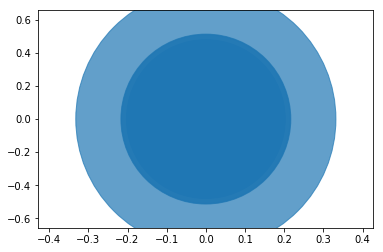

In [ ]:
%%time

# Carreguem les dades del fitxer covid-19
data = pd.read_csv("data/COVID-19.csv")
# Sumem les defuncions per país
deaths_by_country = data.groupby(["countriesAndTerritories"])["deaths"].sum()
# Obtenim les coordenades paral·lelitzant la feina amb quatre processos
countries_coords = get_coords_multiproc(deaths_by_country.index, num_processes=4)
# Mostrem els resultats
plot_results(deaths_by_country, countries_coords)

1.2. Implementeu un programa *multithreaded* que generi el gràfic de dispersió especificat. Per fer-ho, penseu quines tasques poden executar-se en diferents *threads* i quines eines podeu fer servir per evitar les interferències entre els *threads*.

En aquest cas, farem servir una implementació similar a la versió multiprocés:
* Mantindrem l'ús de la `JoinableQueue` per coordinar les tasques dels diferents processos.
* No ens caldrà fer servir una cua de resultats, ja que els *threads* comparteixen variables. Per tant, crearem directament un diccionari de resultats `countries_coords`, i els *threads* hi escriuran directament els resultats que vagin obtenint. Farem servir un `lock` per evitar interferències en l'actualització del diccionari.

In [ ]:
def get_coords_thr(t_index, countries_q, lock, countries_coords):
    """
    Obté tasques (països dels quals volem saber les coordenades)
        de la cua `countries_q`, fa les tasques i desa els
        resultats al diccionari `countires_coords`.

    Finalitza quan ja no hi ha tasques per fer.
    """
    logging.info("[T{}]\tStarted".format(t_index))

    # Obtenim la primera tasca
    country = countries_q.get()
    # Mentre hi hagi tasques pendents, les fem
    while country:
        logging.info("[T{}]\tStarting to work on {}".format(t_index, country))
        r = get_geo_cords(country)
        logging.info("[T{}]\tResult is {}".format(t_index, r))
        # Desem el resultat al diccionari de resultats després d'obtenir
        # el lock i l'alliberem quan acabem d'actualitzar el diccionari
        lock.acquire()
        countries_coords[country] = r
        lock.release()
        # Indiquem que hem finalitzat la tasca
        countries_q.task_done()
        # Obtenim la propera tasca
        country = countries_q.get()

    logging.info("[T{}]\tEnding".format(t_index))
    # Indiquem que hem finalitzat l'última tasca obtinguda de la cua
    # (que era None, el marcador de final de tasques)
    countries_q.task_done()
    logging.info("[T{}]\tThread ended".format(t_index))


def get_coords_multithr(countries, num_threads, lock, countries_coords):
    """
    Obté les coordenades geogràfiques d'una llista de països fent servir
    `num_threads` *threads* per obtenir les dades.
    """

    # Creem la cua de tasques per fer
    countries_q = JoinableQueue()
    # Afegim els països a la cua de tasques
    for country in countries:
        countries_q.put(country)

    # Afegim un indicador de final de tasca al final de la llista
    # de tasques per a cada *thread*
    for _ in range(num_threads):
        countries_q.put(None)

    # Iniciem els `num_threads` fils amb la tasca d'obtenir
    # les coordenades i passant la cua com a paràmetre
    for i in range(num_threads):
        thread = Thread(target=get_coords_thr, args=(i, countries_q, lock, countries_coords))
        thread.start()

    # Esperem que s'hagin completat totes les tasques
    logging.info("[M]\tWaiting to join threads")
    countries_q.join()
    logging.info("[M]\tThreads joined!")


[18567]	17:02:21 INFO: [T0]	Started
[18567]	17:02:21 INFO: [T1]	Started
[18567]	17:02:21 INFO: [T2]	Started
[18567]	17:02:21 INFO: [T0]	Starting to work on Afghanistan
[18567]	17:02:21 INFO: [T3]	Started
[18567]	17:02:21 INFO: [M]	Waiting to join threads
[18567]	17:02:21 INFO: [T1]	Starting to work on Albania
[18567]	17:02:21 INFO: [T2]	Starting to work on Algeria
[18567]	17:02:21 INFO: [T3]	Starting to work on Andorra
[18567]	17:02:22 INFO: [T1]	Result is (0, 0)
[18567]	17:02:22 INFO: [T0]	Result is (0, 0)
[18567]	17:02:22 INFO: [T2]	Result is (0, 0)
[18567]	17:02:22 INFO: [T3]	Result is (0, 0)
[18567]	17:02:22 INFO: [T1]	Starting to work on Angola
[18567]	17:02:22 INFO: [T0]	Starting to work on Anguilla
[18567]	17:02:22 INFO: [T2]	Starting to work on Antigua_and_Barbuda
[18567]	17:02:22 INFO: [T3]	Starting to work on Argentina
[18567]	17:02:22 INFO: [T2]	Result is (0, 0)
[18567]	17:02:22 INFO: [T2]	Starting to work on Armenia
[18567]	17:02:22 INFO: [T0]	Result is (0, 0)
[18567]	17:02

[18567]	17:02:25 INFO: [T2]	Result is (0, 0)
[18567]	17:02:25 INFO: [T2]	Starting to work on Greenland
[18567]	17:02:25 INFO: [T1]	Result is (0, 0)
[18567]	17:02:25 INFO: [T0]	Result is (0, 0)
[18567]	17:02:25 INFO: [T1]	Starting to work on Grenada
[18567]	17:02:25 INFO: [T0]	Starting to work on Guam
[18567]	17:02:25 INFO: [T3]	Result is (0, 0)
[18567]	17:02:25 INFO: [T3]	Starting to work on Guatemala
[18567]	17:02:25 INFO: [T2]	Result is (0, 0)
[18567]	17:02:25 INFO: [T2]	Starting to work on Guernsey
[18567]	17:02:26 INFO: [T0]	Result is (0, 0)
[18567]	17:02:26 INFO: [T1]	Result is (0, 0)
[18567]	17:02:26 INFO: [T0]	Starting to work on Guinea
[18567]	17:02:26 INFO: [T1]	Starting to work on Guinea_Bissau
[18567]	17:02:26 INFO: [T2]	Result is (0, 0)
[18567]	17:02:26 INFO: [T2]	Starting to work on Guyana
[18567]	17:02:26 INFO: [T0]	Result is (0, 0)
[18567]	17:02:26 INFO: [T3]	Result is (0, 0)
[18567]	17:02:26 INFO: [T0]	Starting to work on Haiti
[18567]	17:02:26 INFO: [T3]	Starting to wo

[18567]	17:02:29 INFO: [T3]	Result is (0, 0)
[18567]	17:02:29 INFO: [T3]	Starting to work on Saint_Kitts_and_Nevis
[18567]	17:02:30 INFO: [T1]	Result is (0, 0)
[18567]	17:02:30 INFO: [T1]	Starting to work on Saint_Lucia
[18567]	17:02:30 INFO: [T0]	Result is (0, 0)
[18567]	17:02:30 INFO: [T0]	Starting to work on Saint_Vincent_and_the_Grenadines
[18567]	17:02:30 INFO: [T3]	Result is (0, 0)
[18567]	17:02:30 INFO: [T3]	Starting to work on San_Marino
[18567]	17:02:30 INFO: [T2]	Result is (0, 0)
[18567]	17:02:30 INFO: [T2]	Starting to work on Sao_Tome_and_Principe
[18567]	17:02:30 INFO: [T1]	Result is (0, 0)
[18567]	17:02:30 INFO: [T1]	Starting to work on Saudi_Arabia
[18567]	17:02:30 INFO: [T0]	Result is (0, 0)
[18567]	17:02:30 INFO: [T0]	Starting to work on Senegal
[18567]	17:02:30 INFO: [T3]	Result is (0, 0)
[18567]	17:02:30 INFO: [T3]	Starting to work on Serbia
[18567]	17:02:30 INFO: [T2]	Result is (0, 0)
[18567]	17:02:30 INFO: [T2]	Starting to work on Seychelles
[18567]	17:02:30 INFO: [

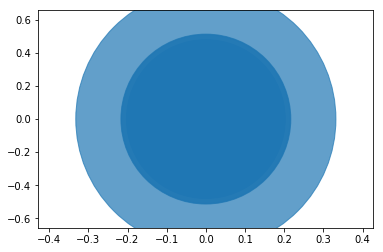

In [ ]:
%%time

# Carreguem les dades del fitxer covid-19
data = pd.read_csv("data/COVID-19.csv")
# Sumem les defuncions per país
deaths_by_country = data.groupby(["countriesAndTerritories"])["deaths"].sum()
# Obtenim les coordenades paral·lelitzant la feina amb quatre *threads*
lock = Lock()
countries_coords = {}
get_coords_multithr(deaths_by_country.index, 4, lock, countries_coords)
# Mostrem els resultats
plot_results(deaths_by_country, countries_coords)

1.3. Reflexioneu sobre quina de les dues implementacions hauria de ser la més eficient per resoldre el problema plantejat.

Experimentalment, podem comprovar que el temps d'execució d'ambdues versions és molt similar (27,8 segons per a l'execució original del *notebook*).

Conceptualment, la tasca que executem en els múltiples fils o processos és una tasca limitada per la xarxa (sia per l'amplada de banda de la nostra màquina o pel temps de resposta del servidor) i que requereix molt poc càlcul de CPU. Per tant, tant l'execució paral·lela en diversos processos com la concurrent en una única CPU tenen un temps d'execució similar, limitat per la xarxa i no pas per la CPU. Filant molt prim, podríem dir que la versió *multithreaded* genera menys *overhead* (crear *threads* és més ràpid que no pas crear processos), però per a l'execució concreta que hem fet, això no arriba a tenir un impacte notable en el rendiment. També podríem dir que la versió multiprocés aprofita millor els recursos de la màquina (ja que executa paral·lelament diverses crides a la API), però de nou això no té un impacte significatiu, ja que el temps de càlcul de CPU que requereix aquesta aplicació és mínim.

# 5. Bibliografia


## 5.1. Bibliografia bàsica

La bibliografia bàsica d'aquesta unitat és el contingut que hem explicat en el *notebook* (no és necessari consultar cap enllaç extern).


## 5.2. Bibliografia addicional (ampliació de coneixements)

En la introducció d'aquesta unitat hem detallat de manera simplificada com funciona la gestió de memòria en l'execució de programes, ja que no és l'objectiu principal d'aquest mòdul. Si esteu interessats a explorar en més detall què diferencia, pel que fa al sistema operatiu, els *threads* dels processos, us recomanem que visiteu els enllaços següents ([1](https://www.youtube.com/watch?v=TRH2HupGkgI), [2](https://www.youtube.com/watch?v=PBb0NRvo96s), [3](https://www.youtube.com/watch?v=Dhf-DYO1K78), [4](https://www.youtube.com/watch?v=3WmNGc9qP0g), [5](https://www.youtube.com/watch?v=X668LfXObaM)).

En aquesta unitat hem presentat una introducció a la programació multiprocés i *multithread* revisant algunes de les principals eines que ofereix Python en aquest context. Ara bé, això és només un petit tast! Si esteu interessats a conèixer altres eines per fer programació concurrent i paral·lela en Python, us recomanem explorar altres eines de la llibreria [`multiprocessing`](https://docs.python.org/3/library/multiprocessing.html), com ara les *pools* de processos ([1](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.pool.Pool), [2](https://sebastianraschka.com/Articles/2014_multiprocessing.html)); l'ús de semàfors, esdeveniments i *conditions* de la llibreria [`threading`](https://docs.python.org/3.8/library/threading.html) ([1](https://hackernoon.com/synchronization-primitives-in-python-564f89fee732)); o la llibreria [asyncio](https://docs.python.org/3/library/asyncio.html). Si preferiu la consulta en format llibre (en comptes de diversos enllaços), us recomanem llegir els capítols 1 a 4 del llibre *Python Parallel Programming Cookbook*, de Giancarlo Zaccone.

Hem vist que el mòdul *multiprocessing* ofereix un parell de classes, [`Value`](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.Value) i [`Array`](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.Array), que representen objectes que s'assignen en un espai de memòria compartida entre els diversos processos. [`Value`](https://docs.python.org/3/library/multiprocessing.html#multiprocessing.Value) retorna un objecte de tipus `ctype`, que ofereix tipus de dades compatibles amb C. Podeu donar un cop d'ull als tipus de dades que ofereix en l'[enllaç següent](https://docs.python.org/3/library/ctypes.html#fundamental-data-types).


Tot i que no era l'objectiu principal d'aquesta unitat, en aquest *notebook* hem fet servir el mòdul [`logging`](https://docs.python.org/3/library/logging.html) per crear diaris que registraven què feien els diferents fils i processos en cada moment. Us recomanem llegir els tutorials oficials (tant el [bàsic](https://docs.python.org/3/howto/logging.html#logging-basic-tutorial) com el més [avançat](https://docs.python.org/3/howto/logging.html#logging-advanced-tutorial)) per tal de conèixer les funcionalitats d'aquest mòdul, que us poden ser útils no solament per seguir el flux d'execució de programes *multithread* o multiprocés, sinó per monitorar qualsevol tipus de programa.